##### 主動推播訊息
有別於 LINE BOT 自動回覆訊息，主動推播訊息表示可以在特定事件被觸發時，主動傳送訊息到使用者端，\
這篇將會介紹 LINE Message API 裡的 push message 方法，並使用 Colab + ngrok 實作主動推播訊息的功能，\
最後再將程式部署到 Google Cloud Functions。

##### 取得 LINE user ID 和 access token 
進入 LINE Developers 的 LINE Channel，在 Basic Setting 裡找到 user ID，在 Message API 裡找到 Channel Access Token。

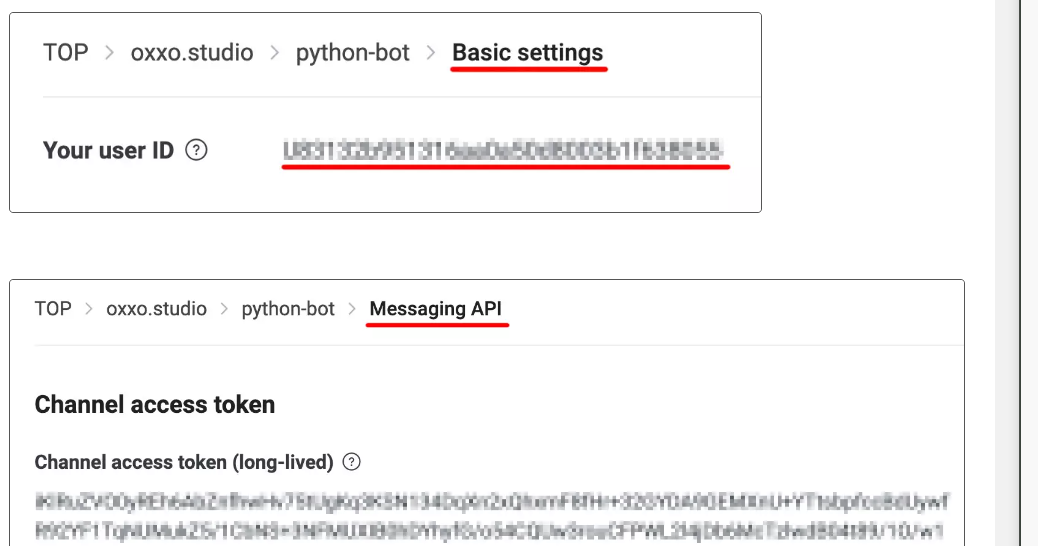

##### 推播文字訊息 
不論是本機環境還是 Colab，使用下列程式碼，輸入 LINE 的 user ID 以及 access token，執行後就會從指定的 LINE Bot 裡收到「Hello World!!!」的文字訊息，\
這也是 LINE BOT 最基本的推播功能。

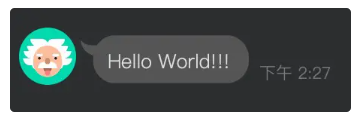

In [ ]:
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage
line_bot_api = LineBotApi('你的 Access Token')
line_bot_api.push_message('要推播的 user ID', TextSendMessage(text='Hello World!!!'))

##### 建立發送訊息的通道 ( 網頁推播 ) 
將 Colab 安裝 flask_ngrok 和 line-bot-sdk 函式庫，使用下方的程式碼，輸入 LINE 的 user ID 以及 access token，利用 Flask 建立一個網頁應用程式。

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

app = Flask(__name__)

@app.route("/")
def home():
  line_bot_api = LineBotApi('jOf8WWCSyfrnGShm2Ts9crr3EdptnrXvby1dZw')
  try:
    # 網址被執行時，等同使用 GET 方法發送 request，觸發 LINE Message API 的 push_message 方法
    line_bot_api.push_message('U5cbe0a', TextSendMessage(text='Hello World!!!'))
    return 'OK !!'
  except:
    print('error')

if __name__ == "__main__":
    app.run()

完成後，執行程式，從瀏覽器開啟 ngrok 產生的網址，開啟後，如果有加入這個 LINE BOT 為好友，就會收到 LINE BOT 推播的訊息。

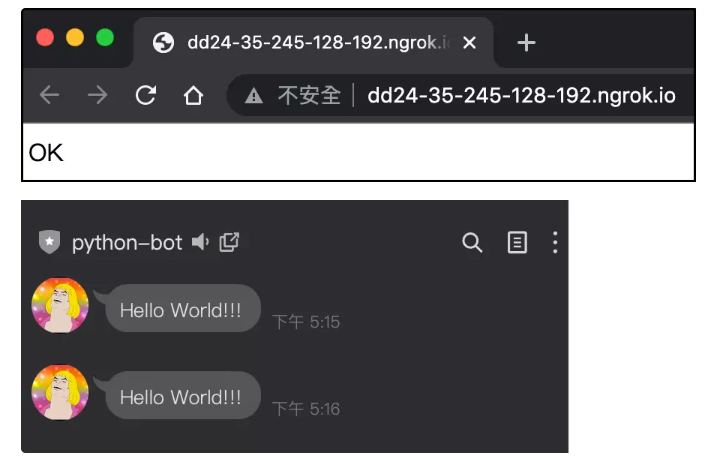

修改程式，使用 Flask 的 request 取得網址的 msg 參數，判斷如果有 msg 參數，就使用 LINE Message API 的 push_message，讓 LINE BOT 主動推播 msg 參數的值。

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

app = Flask(__name__)

@app.route("/")
def home():
  line_bot_api = LineBotApi('jOf8WWCSyfrnGShm2Ts9crr3Edp')
  try:
    msg = request.args.get('msg')   # 取得網址的 msg 參數
    if msg != None:
        # 如果有 msg 參數，觸發 LINE Message API 的 push_message 方法
        line_bot_api.push_message('U5cbe0', TextSendMessage(text=msg))
        return msg
    else:
        return 'OK'
  except:
    print('error')

if __name__ == "__main__":
    app.run()

完成後，執行程式，從瀏覽器開啟 ngrok 產生的網址，在網址後方輸入「?msg=XXXX」，重新整理後，如果有加入這個 LINE BOT 為好友，就會收到 LINE BOT 推播的訊息。

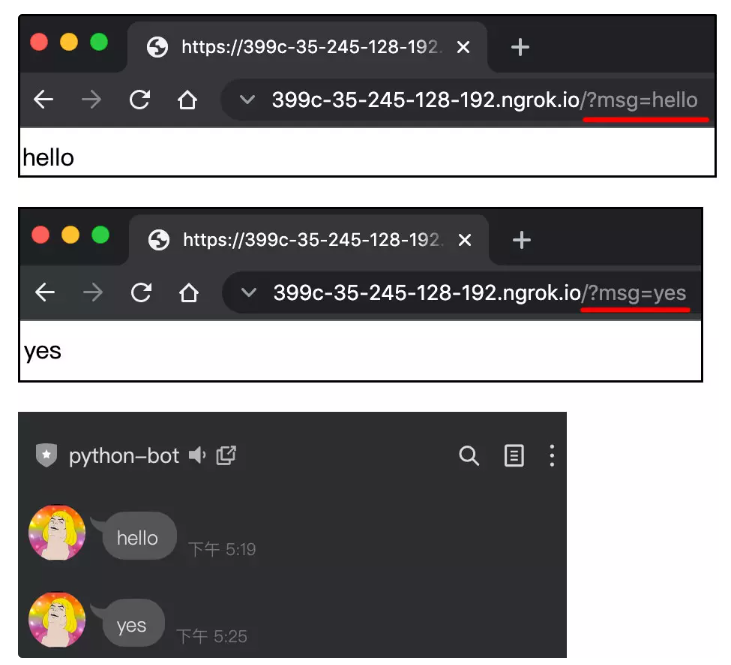

##### 推播訊息的方法 
LINE 的訊息包含了文字、表情貼圖、圖片、地點...等類型，每種類型都有對應的推播訊息方法，下方列出常用類型的推播方法 ( 使用前需要先 import )：

* 注意，只有在「開發者」模式下，可以免費推播訊息 ( 有 50 個好友帳號的額度 )，如果要作為官方帳號使用，則需要付費開通推播訊息的功能。

使用「TextSendMessage」方法推播文字訊息。

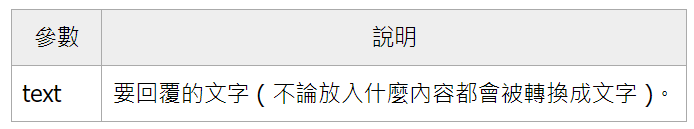

使用「StickerSendMessage」方法推播表情貼圖。

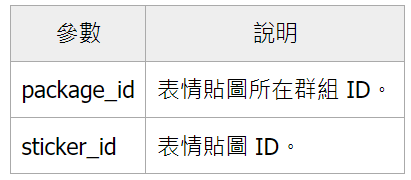

使用「ImageSendMessage」或「VideoSendMessage」方法推播圖片或影片。

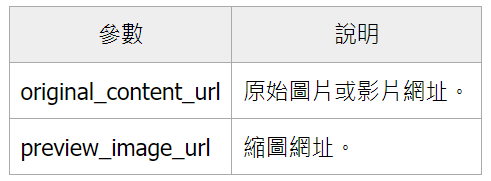

使用「LocationSendMessage」方法推播地點資訊。

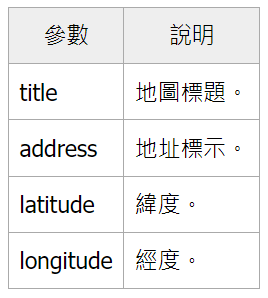

下方的程式執行後，開啟 ngrok 產生的網址，在網址後方輸入對應的參數並重新開啟，就會看見 LINE 出現不同類型的訊息。

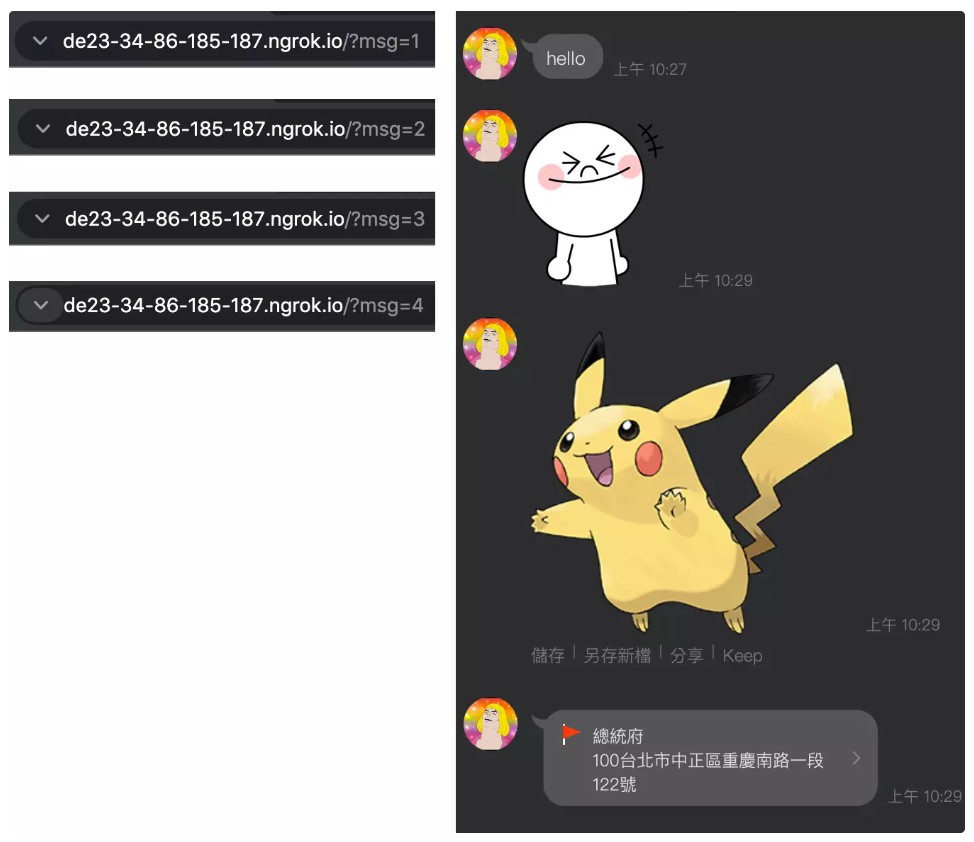

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok   # Colab 環境需要，本機環境不需要

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

import json
app = Flask(__name__)

# Colab 環境需要下面這三行，本機環境不需要
# port = "5000"
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

app = Flask(__name__)

@app.route("/")
def home():
  line_bot_api = LineBotApi('jOf8WWCSyfrnGShm2Ts9crr3EdptnrX')
  try:
    msg = request.args.get('msg')
    if msg == '1':
      # 如果 msg 等於 1，發送文字訊息
      line_bot_api.push_message('U5cbe0a3', TextSendMessage(text='hello'))
    elif msg == '2':
      # 如果 msg 等於 2，發送表情貼圖
      line_bot_api.push_message('U5cbe0ad', StickerSendMessage(package_id=1, sticker_id=2))
    elif msg == '3':
      # 如果 msg 等於 3，發送圖片
      imgurl = 'https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png'
      line_bot_api.push_message('U5cbe0a32', ImageSendMessage(original_content_url=imgurl, preview_image_url=imgurl))
    elif msg == '4':
      # 如果 msg 等於 4，發送地址資訊
      line_bot_api.push_message('U5cbe0a', LocationSendMessage(title='總統府',
                                                address='100台北市中正區重慶南路一段122號',
                                                latitude='25.040319874750914',
                                                longitude='121.51162883484746'))
    else:
      msg = 'ok'   # 如果沒有 msg 或 msg 不是 1～4，將 msg 設定為 ok
    return msg
  except:
    print('error')

if __name__ == "__main__":
    app.run()

##### 部署程式到 Google Cloud Functions 
因為使用 ngrok + Colab 的 Python 程式，只會運作幾個小時就停止，甚至再次執行時需要重新安裝相關函式庫，所以只能作為「開發中」使用，\
如果要真正建構 LINE BOT 的 Python 程式，除了可以使用類似 Heroku 之類的雲端伺服器，也可以直接使用 Google Cloud Functions 部署程式。

* 參考：使用 Google Cloud Functions

登入 Google 帳號，啟用 Google Cloud 和 Cloud Functions 後，建立一支 Cloud Functions 的程式，環境設定為 Python 3.7～3.9，進入點設定為 pushmsg。

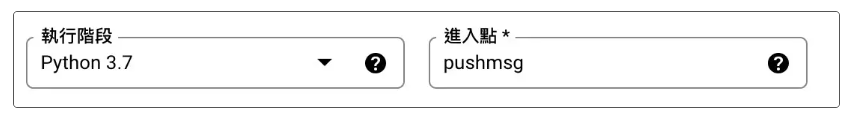

編輯 requirements.txt，在 Cloud Functions 安裝 line-bot-sdk 函式庫。

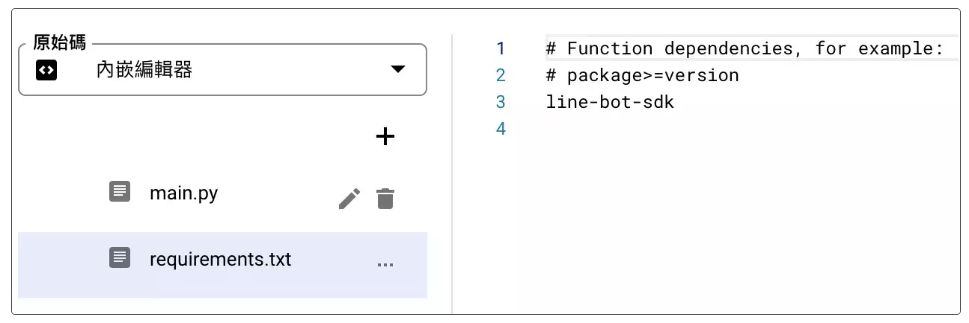

編輯 main.py 主程式檔案，撰寫下方 Python 程式碼，基本上程式內容與上方的程式一樣 ( 只差別在 Flask 的寫法 )。

In [ ]:
from linebot import LineBotApi, WebhookHandler
from linebot.models import TextSendMessage, StickerSendMessage, ImageSendMessage, LocationSendMessage

def pushmsg(request):
  line_bot_api = LineBotApi('你的 access token')
  try:
    msg = request.args.get('msg')
    if msg == '1':
      line_bot_api.push_message('你的 user ID', TextSendMessage(text='hello'))
    elif msg == '2':
      line_bot_api.push_message('你的 user ID', StickerSendMessage(package_id=1, sticker_id=2))
    elif msg == '3':
      imgurl = 'https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png'
      line_bot_api.push_message('你的 user ID', ImageSendMessage(original_content_url=imgurl, preview_image_url=imgurl))
    elif msg == '4':
      line_bot_api.push_message('你的 user ID', LocationSendMessage(title='總統府',
                                                address='100台北市中正區重慶南路一段122號',
                                                latitude='25.040319874750914',
                                                longitude='121.51162883484746'))
    else:
      msg = 'ok'
    return msg
  except:
    print('error')

編輯完成後，部署程式，出現綠色打勾圖示表示部署完成。

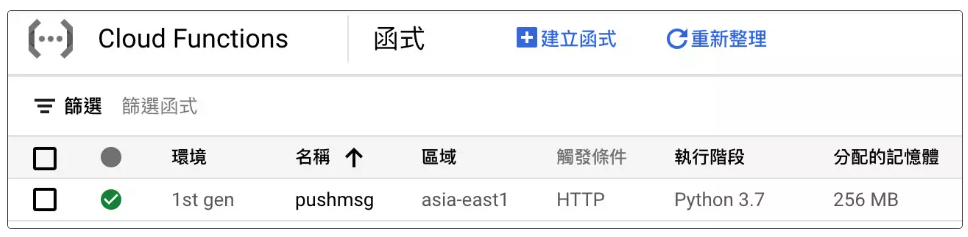

程式部署後，選擇「觸發條件」頁籤，複製觸發的網址。

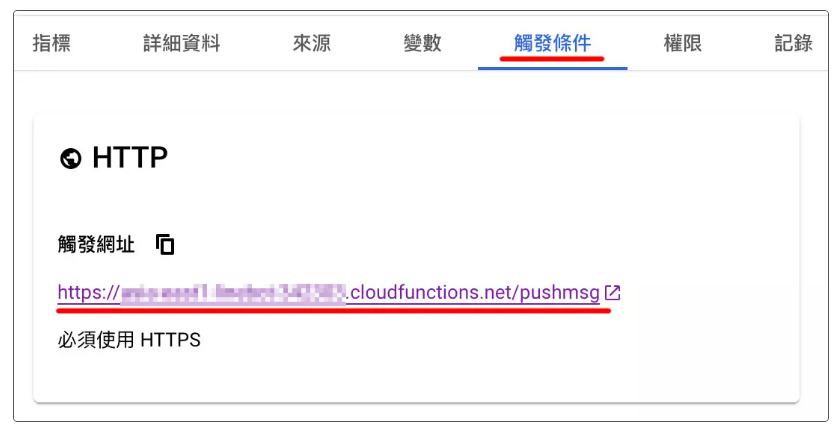

用瀏覽器開啟網址，如果網址後方有加上參數，執行後 LINE 就會收到對應的訊息。

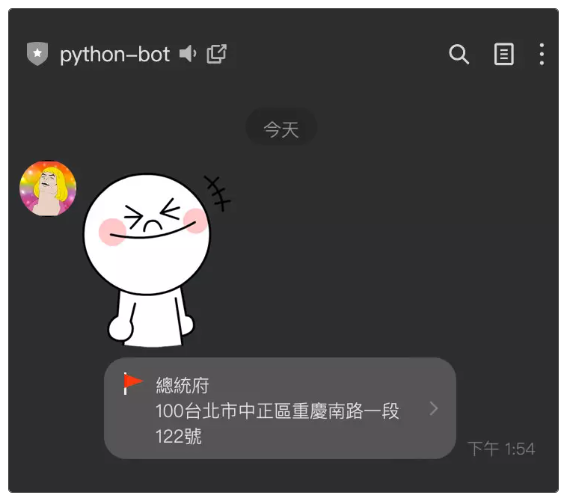

##### 小結 
透過主動推播訊息的方法，就能在特定事件被觸發時，讓 LINE BOT 發送訊息通知，或進一步搭配 reply message 的方法，做出更進階的 LINE BOT。